In [1]:
"#%%"

'#%%'

In [2]:
# Chapter 9 그래프와 시각화

In [3]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

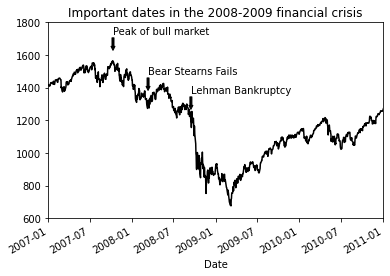

In [4]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# 2007-2010 구간으로 확대
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

In [5]:
# 이 그래프에서는 알고 넘어가야 할 몇몇 중요한 내용이 있는데, ax.annotate 메서드를 이용해서 x, y 좌표로 지정한 위치에 레이블을 추가했으며 set_xlim과 set_ylim 메서드를 이용해서 그래프의 시작과 끝 경계를 직접 지정했다. 

In [6]:
# 마지막으로 ax.set_title 메서드로 그래프의 제목을 지정헀다. 

In [7]:
# 온라인에서 matplotlib 갤러리를 둘러보면 배울 만한 여러 가지 다양한 주석 예제를 확인할 수 있다. 

In [8]:
# 도형을 그리려면 좀 더 신경써야 한다. matplotlib은 일반적인 도형을 표현하기 위한 patches라는 객체를 제공한다. 

In [9]:
# 그중 Reactangle과 Circle 같은 것은 matplotlib.pyplot에서도 찾을 수 있지만 전체 모음은 matplotlib.patches에 있다.

In [10]:
# 그래프에 도형을 추가하러면 patches 객체인 shp를 만들고 서브플롯에 ax.add_patch(shp)를 호출한다. 

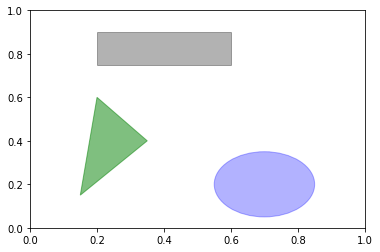

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="k", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="b", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="g", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [12]:
# 보기 좋은 여러 가지 그래프를 잘 살펴보면 다양한 patches를 잘 조합했다는 사실을 확인할 수 있다. 

In [13]:
# 9.1.5 그래프를 파일로 저장하기

In [14]:
# 활성화된 figure는 plt.savefig 메서드를 이용해서 파일로 저장할 수 있다.

In [15]:
# 이 메서드는 figure 객체의 인스턴스 메서드인 savefig와 동일하다. 

In [16]:
# figure를 SVG 포맷으로 저장하려면 다음처럼 하면 된다. 

In [17]:
# plt.savefig(figpath.svg)

In [18]:
# 파일 종류는 확장자로 결정된다. 그러므로 .svg 대신에 .pdf를 입력하면 PDF 파일을 얻게 된다. 

In [19]:
# 출판용 그래픽 파일을 생성할 때 자주 사용하는 몇 가지 중요한 옵션이 있는데 바로 dpi와 bbox_inches다. 

In [20]:
# dpi는 인치당 도트 해상도를 조절하고 bbox_inches는 실제 figure 둘레의 공백을 잘라낸다. 

In [21]:
# 그래프 간 최소 공백을 가지는 400DPI짜리 PNG 파일을 만드려면 아래와 같이 입력한다.

In [22]:
# plt.savefig("figpath.png", dpi=400, bbox_inches="tight")

In [23]:
# savefig 메서드는 파일에 저장할 뿐만 아니라 BytesIO처럼 파일과 유사한 객체에 저장하는 것도 가능하다. 

In [24]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

In [25]:
# [표 9-2]에서 savefig의 다른 옵션을 확인할 수 있다. 페이지 364

In [26]:
# 9.1.6 matplotlib 설정

In [27]:
# matplotlib은 출판물용 그래프를 만드는 데 손색이 없는 기본 설정과 색상 스키마를 함께 제공한다. 

In [28]:
# 다행히도 거의 모든 기본 동작은 많은 전역 인자를 통해 설정 가능한데, 그래프 크기, 서브플롯 간격, 색상, 글자 크기, 격자 스타일과 같은 것들을 설정 가능하다. 

In [29]:
# matplotlib의 환경 설정 시스템은 두 가지 방법으로 다룰 수 있는데, 첫 번째는 rc 메서드를 사용해서 프로그래밍적으로 설정하는 방법이다. 

In [30]:
# 예를 들어 figure의 크기를 10 * 10  으로 전역 설정해두고 싶다면 다음 코드를 실행한다. 

In [31]:
plt.rc("figure", figsize=(10, 10))

In [32]:
# rc 메서드의 첫 번째 인자는 설정하고자 하는 "figure", "axes", "xtick", "ytick", "grid", "legend" 및 다른 컴포넌트의 이름이다. 

In [33]:
# 그 다음으로 설정할 값에 대한 키워드 인자를 넘기게 된다. 이 옵션을 쉽게 작성하려면 파이썬의 사전 타입을 사용한다. 

In [34]:
font_options = {"family" : "monospace",
                "weight": "bold", 
                "size": "small"}
# plt.rc("font", **font_options)

In [35]:
# 더 많은 설정과 옵션의 종류는 matplotlib/mpl-data 디렉터리에 matplotlibrc라는 파일에 저장되어 있다. 
# 다음 절에서 살펴볼 seaborn 패키지는 내부적으로 matplotlib 설정을 사용하는 내장 테마 혹은 스타일을 제공한다. 

In [36]:
# 9.2 pandas에서 seaborn으로 그래프 그리기

In [37]:
# matplotlib은 사실 꽤 저수준의 라이브러리다. 

In [38]:
# 데이터를 어떻게 보여줄 것인지부터(선그래프, 막대그래프, 산포도 등) 범례와 제목, 눈금 라벨, 주석 같은 기본 컴포넌트 그래프를 작성해야 한다.

In [39]:
# pandas를 사용하다 보면 로우와 컬럼 라벨을 가진 다양한 컬럼의 데이터를 다루게 된다. 

In [40]:
# pandas는 Series와 DataFrame 객체를 간단하게 시각화할 수 있는 내장 메서드를 제공한다. 

In [41]:
# 다른 라이브러리로는 마이클 와스콤이 만든 통계 그래픽 라이브러리인 seaborn이 있다. 

In [42]:
# seaborn은 흔히 사용하는 다양한 시각화 패턴을 쉽게 구현할 수 있도록 도와준다. 

In [43]:
# TIP: seaborn 라이브러리를 임포트하면 더 나은 가독성과 미려함을 위해 matplotlib의 기본 컬러 스킴과 플롯 스타일을 변경한다.
# 일부 독자는 seaborn API를 사용하지 않더라도 일반적인 matplotlib 그래프의 스타일을 개선하기 위한 간편한 방법으로 seaborn 라이브러리를 임포트하는 것을 선호할지도 모르겠다.

In [44]:
# 9.2.1 선그래프

In [45]:
# Series와 DataFrame은 둘 다 plot 메서드를 이용해 다양한 형태의 그래프를 생성할 수 있다. 기본적으로 plot 메서드는 선그래프를 생성한다.(그림 9-13)

In [46]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

<AxesSubplot: >

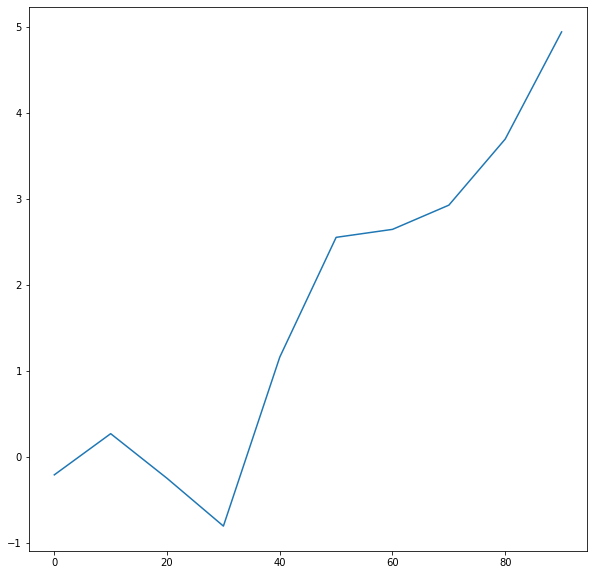

In [47]:
s.plot()

In [48]:
# Series 객체의 색인은 matplotlib에서 그래프를 생성할 때 x축으로 해석되며 use_index=False 옵션을 넘겨서 색인을 그래프의 축으로 사용하는 것을 막을 수 있다.

In [49]:
# x축의 눈금과 한계는 xticks와 xlim 옵션으로 조절할 수 있으며 y축 역시 yticks와 ylim 옵션으로 조절할 수 있다.

In [50]:
# [표 9-3]에서 사용 가능한 plot 메서드의 옵션을 확인할 수 있다. 

In [51]:
# 대부분의 pandas 그래프 메서드는 부수적으로 ax 인자를 받는데, 이 인자는 matplotlib의 서브플롯 객체가 될 수 있다.

In [52]:
# 이를 이용해 그리드 배열 상에서 서브플롯의 위치를 좀 더 유연하게 가져갈 수 있다. 

In [53]:
# DataFrame의 plot 메서드는 하나의 서브플롯 안에 각 컬럼별로 선그래프를 그리고 자동적으로 범례를 생성한다. (그림 9-14)

In [54]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))

<AxesSubplot: >

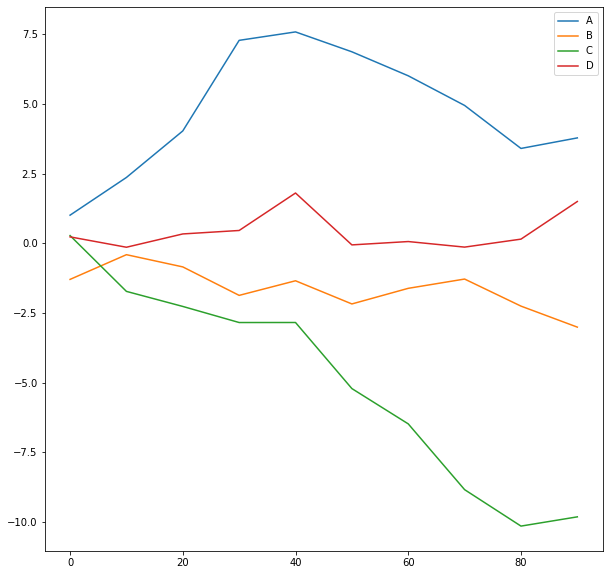

In [55]:
df.plot()

In [56]:
# plot 속성에는 다양한 종류의 그래프 패밀리가 존재한다. 예를 들어 df.plot()은 df.plot.line()과 동일하다. 

In [57]:
# 이런 메서드에 대해서는 잠시 뒤에 알아보자.

In [58]:
# NOTE_ plot 메서드에 전달할 수 있는 부수적인 키워드 인자들은 그대로 matplotlib의 함수로 전달된다.
# 따라서 matplotlib API를 자세히 공부하면 더 다양한 방식으로 그래프를 꾸밀 수 있다. [표 9-3] 페이지 368

In [59]:
# DataFrame에는 컬럼을 쉽게 다루기 위한 몇 가지 옵션이 있는데, 예를 들어 모든 컬럼을 같은 서브플롯에 그릴 것인지 아니면 각각의 서브플롯을 따로 만들 것인지 정할 수 있다.
# [표 9-4]에서 이런 옵션을 확인하자. 페이지 368

In [60]:
# 9.2.2 막대그래프

In [61]:
# plot.bar()와 plot.barh()는 각각 수직막대그래프와 수평막대그래프를 그린다. 

In [62]:
# 이 경우 Series 또는 DataFrame의 색인은 수직막대그래프(bar)인 경우, x 눈금, 수평막대그래프(barh)인 경우 y 눈금으로 사용된다.(그림 9-15)

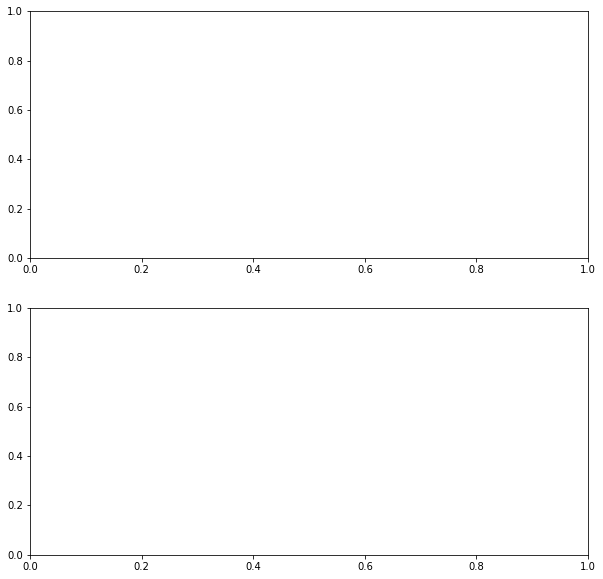

In [63]:
figs, axes = plt.subplots(2, 1)

In [64]:
data = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))

In [65]:
data.plot.bar(ax=axes[0], color="k", alpha=0.7)

<AxesSubplot: >

In [66]:
data.plot.barh(ax=axes[1], color="k", alpha=0.7)

<AxesSubplot: >

In [67]:
# color="k" 옵션과 alpha=0.7 옵션은 그래프를 검은색으로 그리고 투명도를 지정한 것이다. 

In [68]:
# Note_ 막대그래프를 그릴 때 유용한 방법은 Series의 values_counts 메서드(s.value_counts().plot.bar())를 이용해서 값의 빈도를 그리는 것이다. 

In [69]:
# DataFrame에서 막대그래프는 각 로우의 값을 함께 묶어서 하나의 그룹마다 각각의 막대를 보여준다(그림 9-16).

In [70]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

In [71]:
df

Genus,A,B,C,D
one,0.367439,0.498648,0.226575,0.353566
two,0.650852,0.312933,0.768735,0.781837
three,0.852409,0.949906,0.107323,0.910725
four,0.336055,0.826380,0.898101,0.042715
five,0.195795,0.294501,0.627000,0.086223
six,0.142945,0.515827,0.689341,0.856626


<AxesSubplot: >

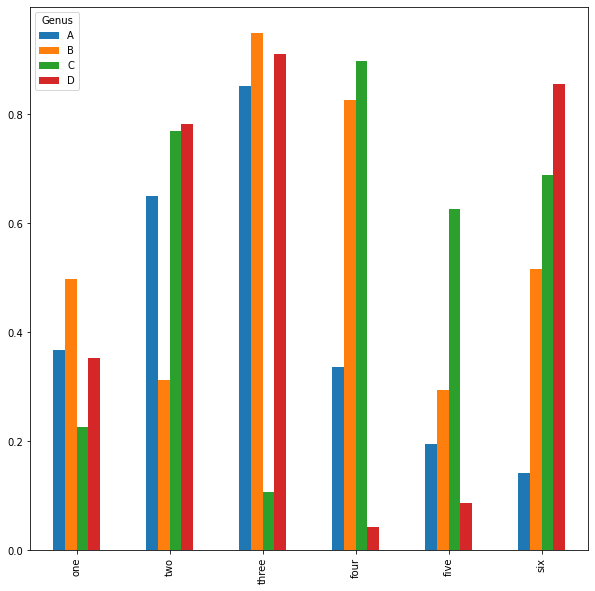

In [72]:
df.plot.bar()

In [73]:
# DataFrame의 컬럼인 "Genus"가 범례의 제목으로 사용되었음을 확인하자.

In [75]:
# 누적막대그래프는 stacked=True 옵션을 사용해서 생성할 수 있는데, 각 로우의 값들이 하나의 막대에 누적되어 출력된다.(그림 9-17) 

<AxesSubplot: >

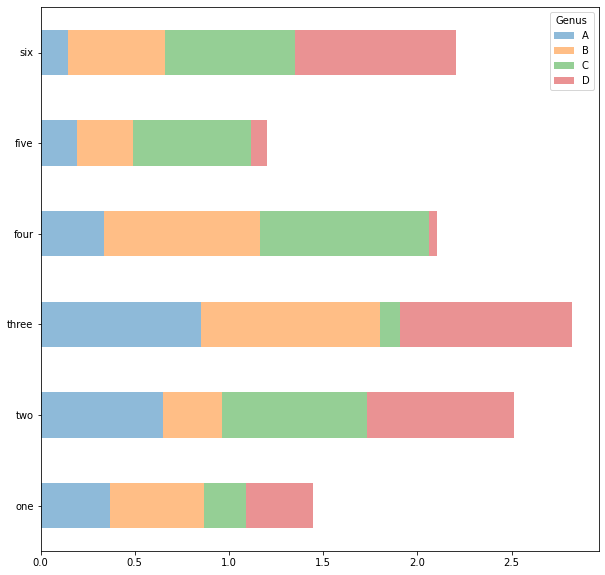

In [76]:
df.plot.barh(stacked=True, alpha=0.5)

In [77]:
# 책의 앞에서 살펴봤던 팁 데이터를 다시 살펴보자. 

In [78]:
# 이 데이터에서 요일별 파티 숫자를 뽑고, 파티 숫자 대비 팁 비율을 보여주는 막대그래프를 그려보자. 

In [79]:
# read_csv 메서드를 사용해서 데이터를 불러오고 요일과 파티 숫자에 따라 교차 테이블을 생성했다. 

In [80]:
tips = pd.read_csv("examples/tips.csv")

In [81]:
party_counts = pd.crosstab(tips["day"], tips["size"])

In [82]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [83]:
# 1인과 6인의 파티는 제외
party_counts = party_counts.loc[:, 2:5]

In [84]:
# 그리고 각 로우의 합이 1이 되도록 정규화하고 그래프를 그려보자(그림 9-18).

In [85]:
# 합이 1이 되도록 정규화
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [86]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot: xlabel='day'>

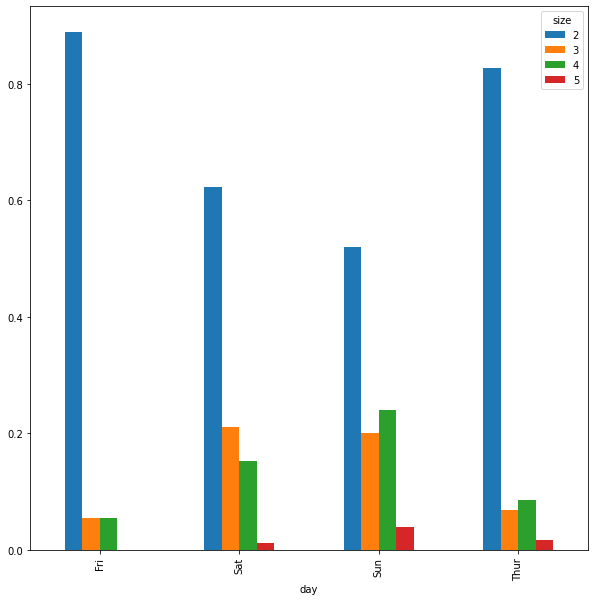

In [87]:
party_pcts.plot.bar()

In [88]:
# 이 데이터에서 파티의 규모는 주말에 커지는 경향이 있음을 알 수 있다. 

In [89]:
# 그래프를 그리기 전에 요약을 해야 하는 데이터는 seaborn 패키지로 팁 데이터를 다시 그려보자.(그림 9-19)

In [91]:
import seaborn as sns

In [92]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

In [93]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot: xlabel='tip_pct', ylabel='day'>

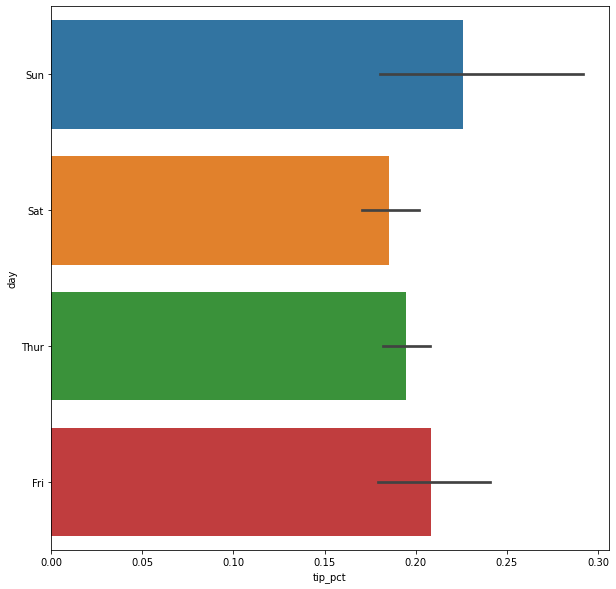

In [94]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [95]:
# seaborn 플로팅 함수의 data 인자는 pandas의 DataFrame을 받는다. 다른 인자들은 컬럼 이름을 참조한다. 

In [96]:
# day 컬럼의 각 값에 대한 데이터는 여럿 존재하므로 tip_pct의 평균값으로 막대그래프를 그린다. 

In [97]:
# 막대그래프 위에 덧그려진 검은 선은 95%의 신뢰구간을 나타낸다(이 값은 옵션으로 설정가능하다).

In [98]:
# seaborn.barplot 메서드의 hue 옵션을 이용하면 추가 분류에 따라 나눠 그릴 수 있다(그림 9-20).

<AxesSubplot: xlabel='tip_pct', ylabel='day'>

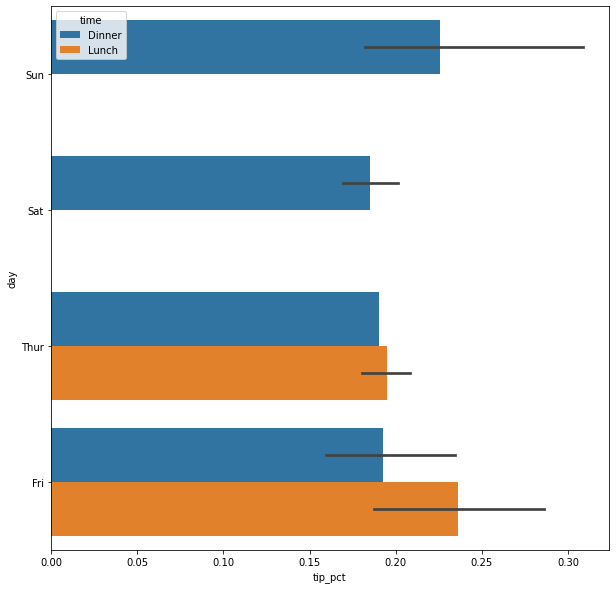

In [99]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [100]:
# seaborn 라이브러리는 자동으로 기본 색상 팔레트, 그래프 배경, 그리드 선 색상 같은 꾸밈새를 변경한다. 

In [101]:
# seaborn.set 메서드를 이용해서 이런 꾸밈새를 변경할 수 있다. 

In [102]:
sns.set(style="whitegrid")